# A Beginner’s Guide to Carry out Extreme Value Analysis (with Codes in Python)-(1) Basic

## Introduction

Extreme value analysis (EVA) is a process that is used primarily to estimate of the probability of events that are more extreme than any previously observed. It is widely applied in many fields such as engineering, meteorology, hydrology, finance and ocean, etc.

The following presents basic steps to carry out EVA upond a time series data of interest based on open source python packages.   

## 1. Download Data

Download station data from https://www.ncdc.noaa.gov/. 
Here the daily summaries were downloaded using ghcnpy (https://github.com/jjrennie/GHCNpy).

An example is used as demo from the station of Dubai Internatinal Airport.

* Firstly, check stations available in Dubai

In [13]:
#import ghcnpy as gp
#gp.find_station("Dubai")

* Secondly, download data in csv format after finding the target station ID

## 2. Load and Handle Time Series in Pandas

Pandas has dedicated libraries for handling time series(TS) objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('notebook', font_scale=1.2)

#### load the data set and look at some initial rows and data types of the columns:

In [15]:
data = pd.read_csv('data/AEM00041194.csv')
print(data.tail())
print('\n Data Types:')
print(data.dtypes)

       YYYY  MM  DD    TMAX    TMIN    PRCP    SNOW    SNWD
12015  2017   8   1    42.7    33.9 -9999.0 -9999.0 -9999.0
12016  2017   8   2    44.5    35.2     0.0 -9999.0 -9999.0
12017  2017   8   3    45.1 -9999.0     0.0 -9999.0 -9999.0
12018  2017   8   4 -9999.0 -9999.0     0.0 -9999.0 -9999.0
12019  2017   8   5    45.0    33.5     0.0 -9999.0 -9999.0

 Data Types:
YYYY      int64
MM        int64
DD        int64
TMAX    float64
TMIN    float64
PRCP    float64
SNOW    float64
SNWD    float64
dtype: object


In [16]:
data.head()

,YYYY,MM,DD,TMAX,TMIN,PRCP,SNOW,SNWD
0,1983,1,1,27.6,14.0,-9999.0,-9999.0,-9999.0
1,1983,1,2,30.2,13.4,-9999.0,-9999.0,-9999.0
2,1983,1,3,25.2,14.3,-9999.0,-9999.0,-9999.0
3,1983,1,4,23.5,15.8,-9999.0,-9999.0,-9999.0
4,1983,1,5,-9999.0,14.5,-9999.0,-9999.0,-9999.0


#### Select annual maxima as extreme values

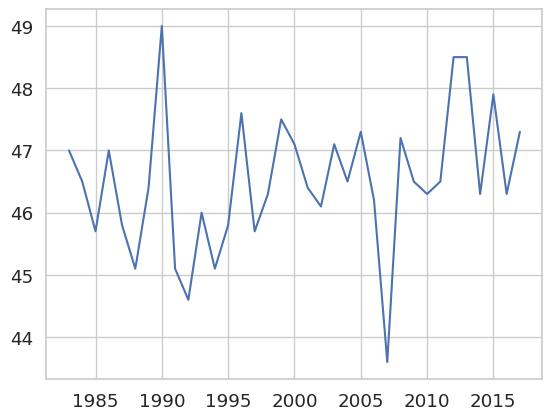

In [17]:
df = data.groupby("YYYY").TMAX.max()
plt.plot(df)

## 3. GEV Analysis

The Python version of L-moments is used to predict optimal parameters for a number of distributions (https://pypi.python.org/pypi/lmoments/). 

Distributions supported are listed below, with their distribution suffix:
* Exponential (EXP)
* Gamma (GAM)
* Generalised Extreme Value (GEV)
* Generalised Logistic (GLO)
* Generalised Normal (GNO)
* Generalised Pareto (GPA)
* Gumbel (GUM)
* Kappa (KAP)
* Normal (NOR)
* Pearson III (PE3)
* Wakeby (WAK)
* Weibull (WEI)
    
lmoments can be installed by
 * pip install lmoments3
 
 
As a demo, only the Generalised Extreme Value (GEV) distribution is used here.

### Import lmoments to carry out GEV analysis

### Calculate moments

### Fit GEV distribution

### Set some return years, and convert them into probabilities. 
Finally, get extreme values corresponding to these probabilities.

In [18]:
import lmoments3 as lm
from lmoments3 import distr

# Fit a GEV distribution to the data
paras = distr.gev.lmom_fit(df)
fitted_gev = distr.gev(**paras)


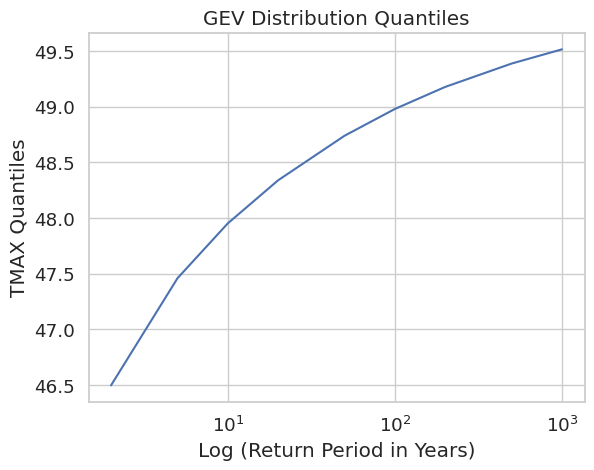

In [19]:
# Define a list of return periods
return_periods = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])

# Calculate quantiles for each return period
quantiles = fitted_gev.ppf(1-1/return_periods)

# Plot the quantiles against the return periods
plt.plot(return_periods, quantiles)
plt.xscale('log')
plt.xlabel('Log (Return Period in Years)')
plt.ylabel('TMAX Quantiles')
plt.title('GEV Distribution Quantiles')
plt.grid(True)
plt.show()


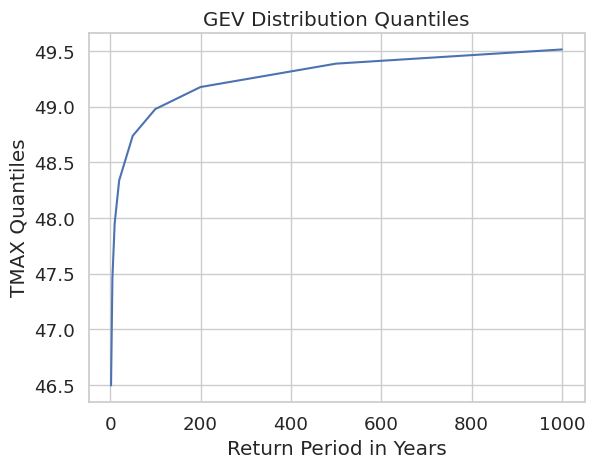

In [20]:
# Plot the quantiles against the return periods
plt.plot(return_periods, quantiles)
plt.xlabel('Return Period in Years')
plt.ylabel('TMAX Quantiles')
plt.title('GEV Distribution Quantiles')
plt.grid(True)
plt.show()

In the context of the provided code, "quantiles" represent specific values of a random variable (in this case, the TMAX variable, which likely represents daily maximum temperatures) corresponding to particular probabilities or return periods. Quantiles are a way to understand and describe the distribution of a random variable.

In the code, the quantiles are calculated for a set of return periods. The return period represents the expected frequency of an event. For example, if you have daily temperature data, a return period of 10 years represents an event that is expected to occur, on average, once every 10 years. A return period of 100 years represents an event expected once every 100 years, and so on.

The quantiles tell you what value of the TMAX variable corresponds to a specific probability of occurrence or return period. For example, if you calculate the 10-year return period quantile for TMAX, it tells you the TMAX value that has a 1/10 (10%) chance of being exceeded in any given year, on average.

So, in the context of this code, the quantiles of the GEV distribution provide insights into the extreme values of the TMAX variable for different return periods, helping to assess the probability and severity of rare and extreme temperature events.

### This a another way to perfor the GEV analysis using the scipy library

Return Period: 2 years, Quantile: 46.5201 TMAX
Return Period: 5 years, Quantile: 47.4878 TMAX
Return Period: 10 years, Quantile: 47.9702 TMAX
Return Period: 20 years, Quantile: 48.3417 TMAX
Return Period: 50 years, Quantile: 48.7180 TMAX
Return Period: 100 years, Quantile: 48.9388 TMAX
Return Period: 200 years, Quantile: 49.1175 TMAX
Return Period: 500 years, Quantile: 49.3031 TMAX
Return Period: 1000 years, Quantile: 49.4132 TMAX


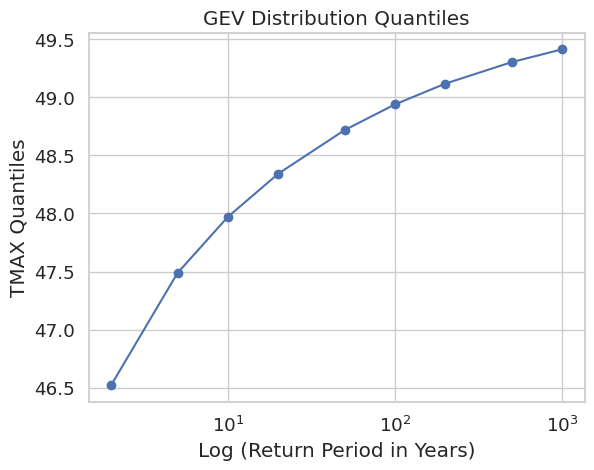

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('data/AEM00041194.csv')

# Extract the TMAX column
tmax_data =data.groupby("YYYY").TMAX.max()

# Fit a GEV distribution to the data
params = stats.genextreme.fit(tmax_data)

# Define a list of return periods
return_periods = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])

# Calculate quantiles for each return period
quantiles = stats.genextreme.ppf(1 - 1.0 / return_periods, *params)

# Print the quantiles
for rp, quantile in zip(return_periods, quantiles):
    print(f'Return Period: {rp} years, Quantile: {quantile:.4f} TMAX')

# Plot the quantiles against the return periods
plt.plot(return_periods, quantiles, marker='o')
plt.xscale('log')
plt.xlabel('Log (Return Period in Years)')
plt.ylabel('TMAX Quantiles')
plt.title('GEV Distribution Quantiles')
plt.grid(True)
plt.show()


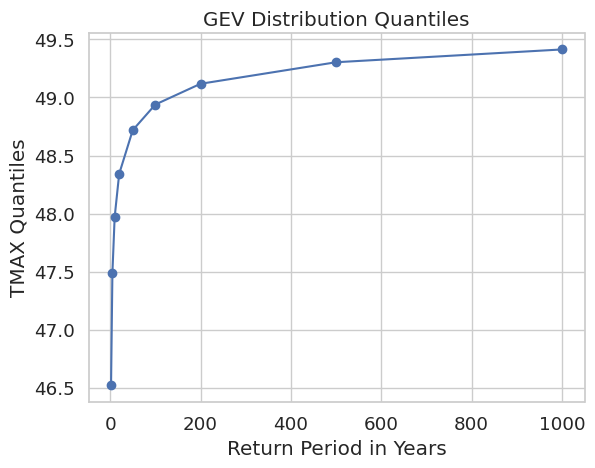

In [22]:
# Plot the quantiles against the return periods
plt.plot(return_periods, quantiles, marker='o')
plt.xlabel('Return Period in Years')
plt.ylabel('TMAX Quantiles')
plt.title('GEV Distribution Quantiles')
plt.grid(True)
plt.show()